In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse

In [86]:
# read the data into a dataframe
raw = pd.read_csv('pet_food_customer_orders.csv')

## PART 1 : Data Cleaning and Formatting 

In [87]:
# view dataframe
raw.head()

,customer_id,pet_id,pet_order_number,wet_food_order_number,orders_since_first_wet_trays_order,pet_has_active_subscription,pet_food_tier,pet_signup_datetime,pet_allergen_list,pet_fav_flavour_list,...,dental_treat_packs,wet_food_textures_in_order,total_web_sessions,total_web_sessions_since_last_order,total_minutes_on_website,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order,last_customer_support_ticket_date,customer_support_ticket_category
0,10574848487411271014,4466839344031767293,2,1.0,1.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,6,4,101,32,0,0,2019-03-16 09:10:12+00:00,proactive
1,10574848487411271014,4466839344031767293,1,NaN,NaN,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,NaN,2,1,69,3,0,0,2019-03-16 09:10:12+00:00,proactive
2,10574848487411271014,4466839344031767293,8,7.0,7.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,18,0,184,0,0,0,2019-10-26 06:10:13+00:00,account
3,10574848487411271014,4466839344031767293,4,3.0,3.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,13,6,130,15,0,0,2019-04-23 06:28:12+00:00,account
4,10574848487411271014,4466839344031767293,9,8.0,8.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,19,1,184,0,0,0,2019-10-26 06:10:13+00:00,account


In [88]:
# View shape of dataframe
raw.shape
# The dataframe has 49042 rows and 36 columns.

(49042, 36)

In [89]:
# view information about the dataframe
print(raw.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49042 entries, 0 to 49041
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                49042 non-null  uint64 
 1   pet_id                                     49042 non-null  uint64 
 2   pet_order_number                           49042 non-null  int64  
 3   wet_food_order_number                      12788 non-null  float64
 4   orders_since_first_wet_trays_order         14372 non-null  float64
 5   pet_has_active_subscription                49042 non-null  bool   
 6   pet_food_tier                              49042 non-null  object 
 7   pet_signup_datetime                        49042 non-null  object 
 8   pet_allergen_list                          10758 non-null  object 
 9   pet_fav_flavour_list                       21022 non-null  object 
 10  pet_health_issue_list 

In [90]:
# view summary statistics for numerical columns
print(raw.describe())

        customer_id        pet_id  pet_order_number  wet_food_order_number  \
count  4.904200e+04  4.904200e+04      49042.000000           12788.000000   
mean   9.237652e+18  9.252460e+18          3.506545               2.914998   
std    5.273450e+18  5.296804e+18          2.864754               2.312705   
min    1.969421e+15  3.629657e+14          1.000000               1.000000   
25%    4.748268e+18  4.648948e+18          1.000000               1.000000   
50%    9.196879e+18  9.318042e+18          3.000000               2.000000   
75%    1.380478e+19  1.378622e+19          5.000000               4.000000   
max    1.844219e+19  1.844234e+19         20.000000              20.000000   

       orders_since_first_wet_trays_order    kibble_kcal      wet_kcal  \
count                        14372.000000   49042.000000  49042.000000   
mean                             3.156137   19764.538353    861.480384   
std                              2.487372   13255.889361   1903.275965   
m

In [91]:
# view data types of each column
print(raw.dtypes)

customer_id                                   uint64
pet_id                                        uint64
pet_order_number                               int64
wet_food_order_number                        float64
orders_since_first_wet_trays_order           float64
pet_has_active_subscription                     bool
pet_food_tier                                 object
pet_signup_datetime                           object
pet_allergen_list                             object
pet_fav_flavour_list                          object
pet_health_issue_list                         object
neutered                                        bool
gender                                        object
pet_breed_size                                object
signup_promo                                  object
ate_wet_food_pre_tails                          bool
dry_food_brand_pre_tails                      object
pet_life_stage_at_order                       object
order_payment_date                            

In [92]:
# I changed the dtype of id into 'object' rather than unit64 .
# Since they are identifiers rather than true numerical values

raw['pet_id'] = raw['pet_id'].astype('object')
raw['customer_id'] = raw['customer_id'].astype('object')


In [93]:
# view column names
print(raw.columns)

Index(['customer_id', 'pet_id', 'pet_order_number', 'wet_food_order_number',
       'orders_since_first_wet_trays_order', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_signup_datetime', 'pet_allergen_list',
       'pet_fav_flavour_list', 'pet_health_issue_list', 'neutered', 'gender',
       'pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
       'dry_food_brand_pre_tails', 'pet_life_stage_at_order',
       'order_payment_date', 'kibble_kcal', 'wet_kcal', 'total_order_kcal',
       'wet_trays', 'wet_food_discount_percent', 'wet_tray_size',
       'premium_treat_packs', 'dental_treat_packs',
       'wet_food_textures_in_order', 'total_web_sessions',
       'total_web_sessions_since_last_order', 'total_minutes_on_website',
       'total_minutes_on_website_since_last_order', 'total_wet_food_updates',
       'total_wet_food_updates_since_last_order',
       'last_customer_support_ticket_date',
       'customer_support_ticket_category'],
      dtype='object')


In [94]:
# check for duplicate rows
print(raw.duplicated().sum())

0


In [95]:
# check for missing values in each column
print(raw.isnull().sum())

customer_id                                      0
pet_id                                           0
pet_order_number                                 0
wet_food_order_number                        36254
orders_since_first_wet_trays_order           34670
pet_has_active_subscription                      0
pet_food_tier                                    0
pet_signup_datetime                              0
pet_allergen_list                            38284
pet_fav_flavour_list                         28020
pet_health_issue_list                        25326
neutered                                         0
gender                                           0
pet_breed_size                                   0
signup_promo                                     0
ate_wet_food_pre_tails                           0
dry_food_brand_pre_tails                      6372
pet_life_stage_at_order                          0
order_payment_date                               0
kibble_kcal                    

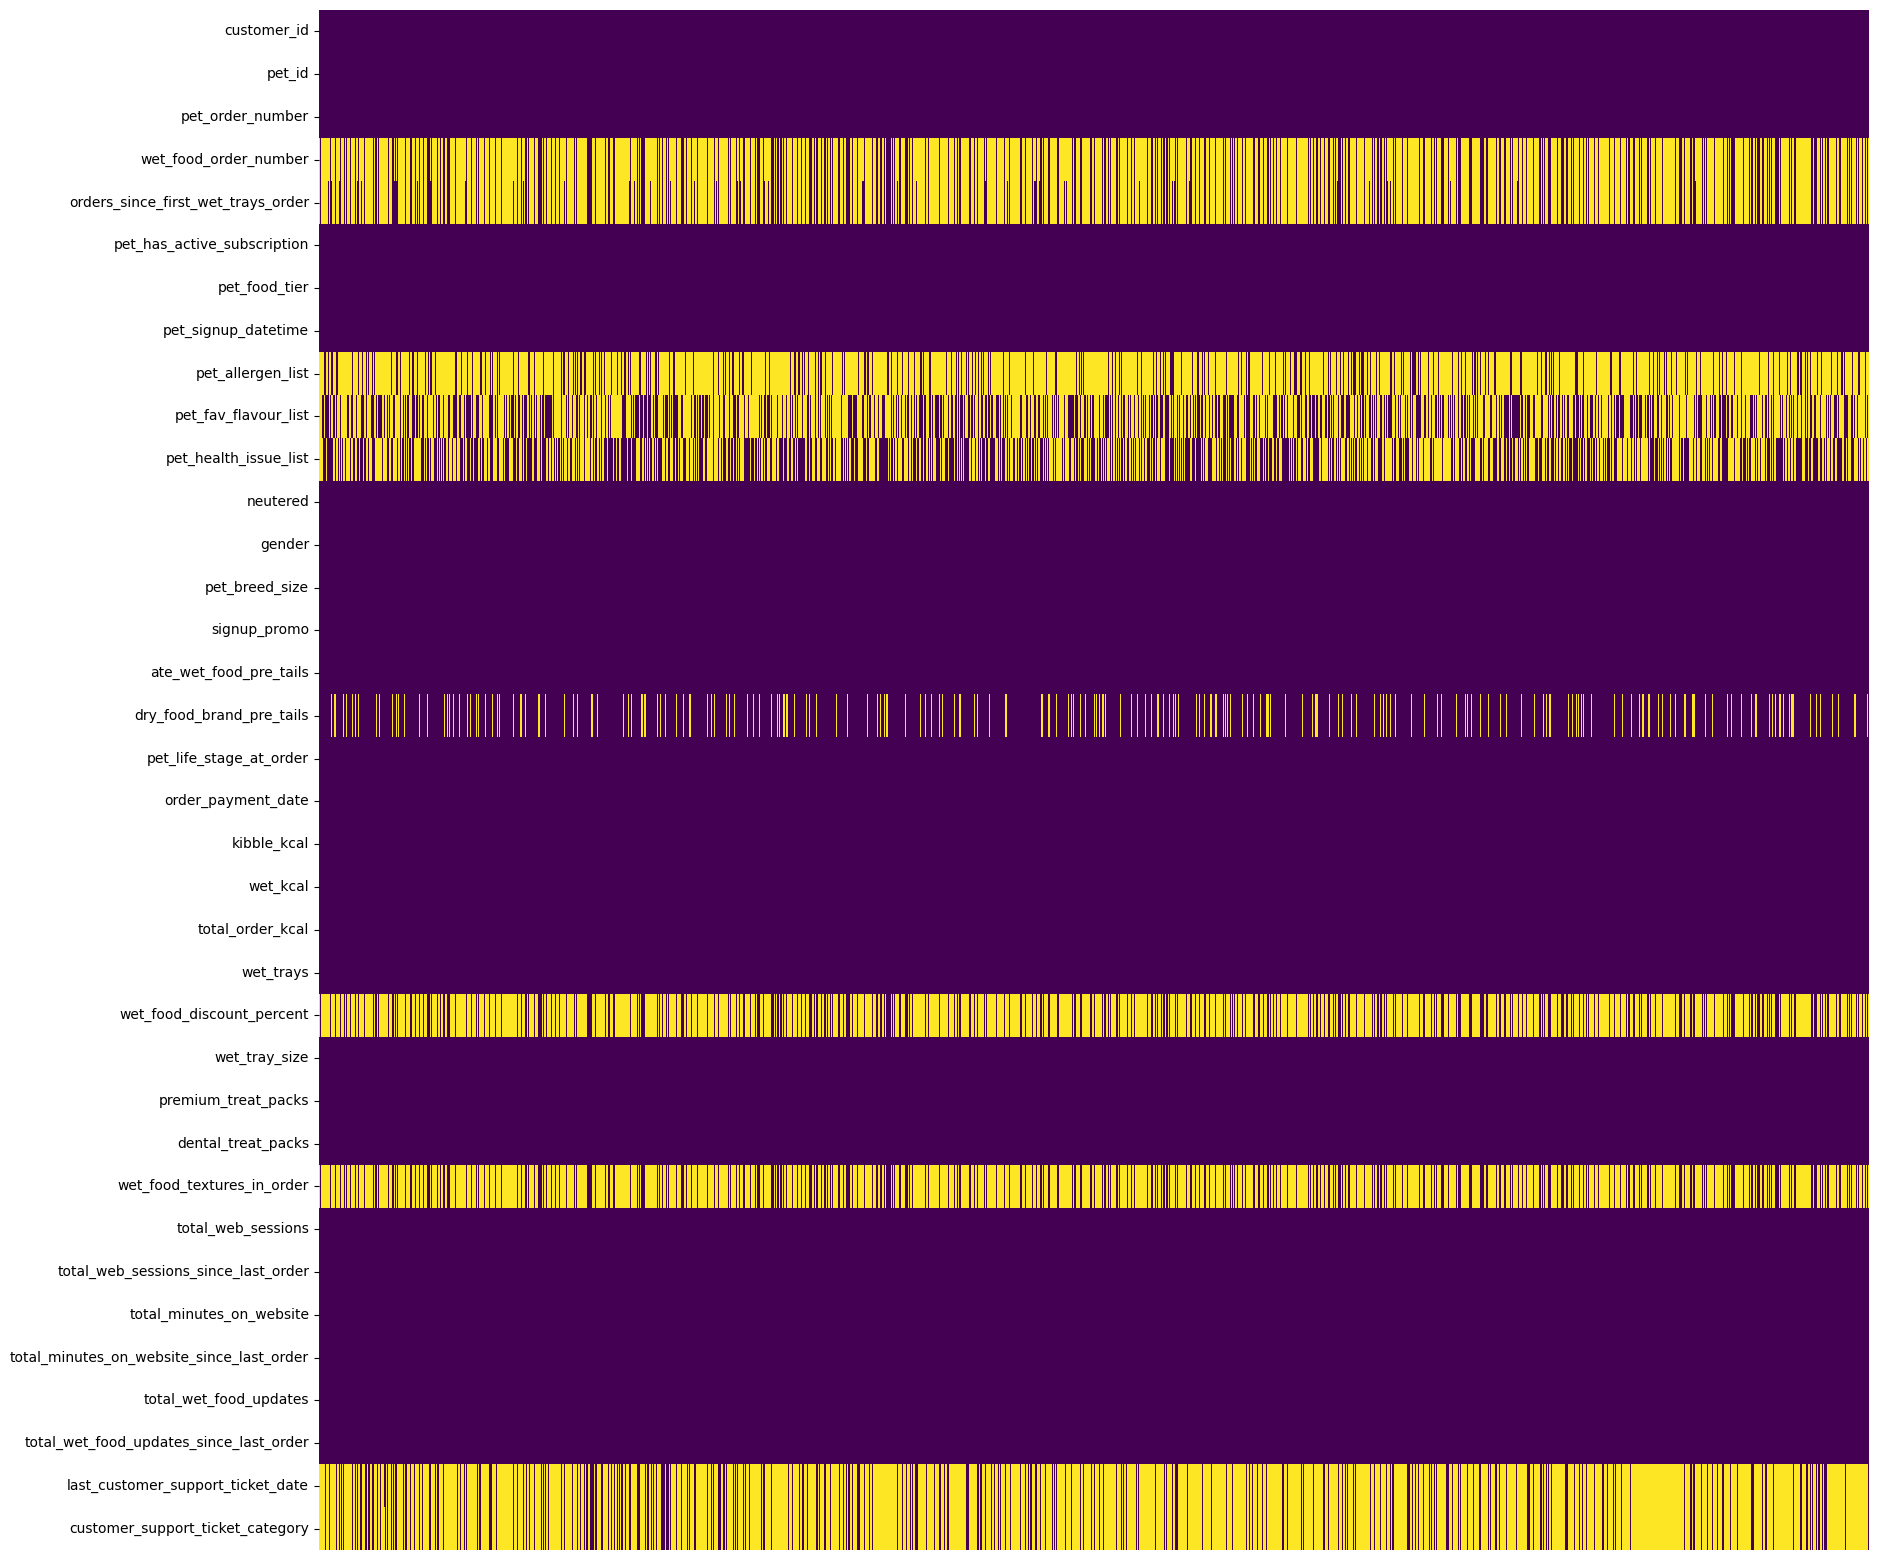

In [96]:
# Created a heatmap to see null value
plt.figure(figsize=(20,20))
sns.heatmap(raw.isnull().T, xticklabels=False, cbar=False, cmap='viridis')
plt.show()


# It seems 'wet_food_order_number', 'orders_since_first_wet_trays_order', 'pet_allergen_list', 'pet_fav_flavour_list',
#'pet_health_issue_list', 'dry_food_brand_pre_tails', 'wet_food_discount_percent', 'wet_food_textures_in_order', 
# 'last_customer_support_ticket_date', 'customer_support_ticket_category' have null values.

In [97]:
# Deal with the null values for columns that have NaN
# Replaced missing values with "Unknown"  to indicate that
# there is no information available for 'pet_fav_flavour_list' column.
raw['pet_fav_flavour_list'].fillna('Unknown', inplace=True)

# Replaced missing values with "No health issues" for 'pet_health_issue_list' column
# to indicate that the pet has no known health issues.
raw['pet_health_issue_list'].fillna('No health issues', inplace=True)

#Replaced missing values with "No known allergies" for 'pet_allergen_list' column 
# to indicate that the pet has no known allergies.
raw['pet_allergen_list'].fillna('No known allergies', inplace=True)

# Replaced missing values with "Unknown"  to indicate that 
# there is no information available for this column.
raw['dry_food_brand_pre_tails'].fillna('Unknown', inplace=True)

In [98]:
#  It might be more appropriate to fill 'wet_food_order_number' and 
# 'orders_since_first_wet_trays_order' with 0 if many customers have never ordered wet food.
raw['wet_food_order_number'].fillna(0, inplace=True)
raw['orders_since_first_wet_trays_order'].fillna(0, inplace=True)

# Replaced NaN with 0 for wet_food_discount_percent column
#since there are relatively few missing values in this column 
# (only about 74% of pets have at least one wet food order)
raw['wet_food_discount_percent'].fillna(0, inplace=True)



In [99]:
#  Replaced NaN with mode for wet_food_textures_in_order column
# since there are relatively many missing values in this column 
# (about 74% of pets have no wet food order or have missing texture information)
mode_wet_food_textures_in_order = raw['wet_food_textures_in_order'].mode()[0]
raw['wet_food_textures_in_order'].fillna(mode_wet_food_textures_in_order, inplace=True)

# Replaced NaN with mode for customer_support_ticket_category column
# since this column has relatively many missing values 
# (about 79% of pets have no customer support ticket or have missing category information)
mode_customer_support_ticket_category = raw['customer_support_ticket_category'].mode()[0]
raw['customer_support_ticket_category'].fillna(mode_customer_support_ticket_category, inplace=True)


In [100]:
# Handle date columns
# We'll keep the date columns as is to preserve daily-level granularity
raw['order_payment_date'] = pd.to_datetime(raw['order_payment_date'], utc=True)
raw['last_customer_support_ticket_date'] = pd.to_datetime(raw['last_customer_support_ticket_date'], utc=True, errors='coerce')
# summarize min and max date
df_dates = raw.agg({'order_payment_date': ['min', 'max']})

df_dates

,order_payment_date
min,2018-12-30 00:00:00+00:00
max,2020-03-30 00:00:00+00:00


In [101]:
# Derive new columns
raw['Order_year_month'] = raw['order_payment_date'].dt.to_period('M')
# Extract year and month
raw['Order_year'] = raw['order_payment_date'].dt.year
raw['Order_month'] = raw['order_payment_date'].dt.month


# Extract year and month for last customer support ticket date
# Define a minimum date to replace missing dates 
#(e.g., the earliest date in your dataset or any other date as per your requirement)
min_date = raw['last_customer_support_ticket_date'].min()
# Replace missing 'last_customer_support_ticket_date' with the minimum date
raw['last_customer_support_ticket_date'].fillna(min_date, inplace=True)

raw['last_customer_support_ticket_date'] = raw['last_customer_support_ticket_date'].dt.to_period('M')
raw['last_customer_support_ticket_year'] = raw['last_customer_support_ticket_date'].dt.year
raw['last_customer_support_ticket_month'] = raw['last_customer_support_ticket_date'].dt.month

# drop the column from the DataFrame
raw = raw.drop(['pet_signup_datetime'], axis=1)

raw.head()
# Now we know the year and month that customer placed each order.

/var/folders/26/c1bkb3tn2xb6kwq543smyqcm0000gn/T/ipykernel_44414/3149613374.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  raw['Order_year_month'] = raw['order_payment_date'].dt.to_period('M')
/var/folders/26/c1bkb3tn2xb6kwq543smyqcm0000gn/T/ipykernel_44414/3149613374.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  raw['last_customer_support_ticket_date'] = raw['last_customer_support_ticket_date'].dt.to_period('M')


,customer_id,pet_id,pet_order_number,wet_food_order_number,orders_since_first_wet_trays_order,pet_has_active_subscription,pet_food_tier,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,...,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order,last_customer_support_ticket_date,customer_support_ticket_category,Order_year_month,Order_year,Order_month,last_customer_support_ticket_year,last_customer_support_ticket_month
0,10574848487411271014,4466839344031767293,2,1.0,1.0,True,superpremium,No known allergies,Chicken,"digestion, joints",...,32,0,0,2019-03,proactive,2019-04,2019,4,2019,3
1,10574848487411271014,4466839344031767293,1,0.0,0.0,True,superpremium,No known allergies,Chicken,"digestion, joints",...,3,0,0,2019-03,proactive,2019-03,2019,3,2019,3
2,10574848487411271014,4466839344031767293,8,7.0,7.0,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,0,2019-10,account,2019-10,2019,10,2019,10
3,10574848487411271014,4466839344031767293,4,3.0,3.0,True,superpremium,No known allergies,Chicken,"digestion, joints",...,15,0,0,2019-04,account,2019-05,2019,5,2019,4
4,10574848487411271014,4466839344031767293,9,8.0,8.0,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,0,2019-10,account,2019-11,2019,11,2019,10


In [102]:
# It seems 'wet_food_order_number ',' orders_since_first_wet_trays_order ' should not be float64
# converted them into integer.

# Replace empty strings with 0 so we can convert them into integer.
raw['orders_since_first_wet_trays_order'] = raw['orders_since_first_wet_trays_order'].replace('', 0)
raw['wet_food_order_number'] = raw['wet_food_order_number'].replace('', 0)

# Convert columns to integer.
raw['orders_since_first_wet_trays_order'] = raw['orders_since_first_wet_trays_order'].astype(int)
raw['wet_food_order_number'] = raw['wet_food_order_number'].astype(int)
raw.head()

# Now they are int.

,customer_id,pet_id,pet_order_number,wet_food_order_number,orders_since_first_wet_trays_order,pet_has_active_subscription,pet_food_tier,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,...,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order,last_customer_support_ticket_date,customer_support_ticket_category,Order_year_month,Order_year,Order_month,last_customer_support_ticket_year,last_customer_support_ticket_month
0,10574848487411271014,4466839344031767293,2,1,1,True,superpremium,No known allergies,Chicken,"digestion, joints",...,32,0,0,2019-03,proactive,2019-04,2019,4,2019,3
1,10574848487411271014,4466839344031767293,1,0,0,True,superpremium,No known allergies,Chicken,"digestion, joints",...,3,0,0,2019-03,proactive,2019-03,2019,3,2019,3
2,10574848487411271014,4466839344031767293,8,7,7,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,0,2019-10,account,2019-10,2019,10,2019,10
3,10574848487411271014,4466839344031767293,4,3,3,True,superpremium,No known allergies,Chicken,"digestion, joints",...,15,0,0,2019-04,account,2019-05,2019,5,2019,4
4,10574848487411271014,4466839344031767293,9,8,8,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,0,2019-10,account,2019-11,2019,11,2019,10


In [103]:
# Created a completely new copy of the cleaned dataframe
cleaned_df = raw.copy()

In [104]:
# Export the dataframe to a new CSV file
cleaned_df.to_csv('Cleaned_data.csv', index=False)

# Part 2: Exploratory Data Analysis (EDA)

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
# read the data into a dataframe
df = pd.read_csv('Cleaned_data.csv')

# Part 2-1. Top 10 customers

In [107]:
# Add a new column which count the number of orders that each customer has placed
# We can see which customer placed the most orders
num_orders = df.groupby('customer_id')['pet_order_number'].sum().sort_values(ascending=False)
num_orders

customer_id
3224805444806377375     356
3944932459261526104     331
17801152157558505956    300
10922890556329147738    297
8189627308145546422     288
                       ... 
10979523664481001664      1
5998444118653514871       1
1290136557293782630       1
14216351962393187657      1
6136034662122765584       1
Name: pet_order_number, Length: 11168, dtype: int64

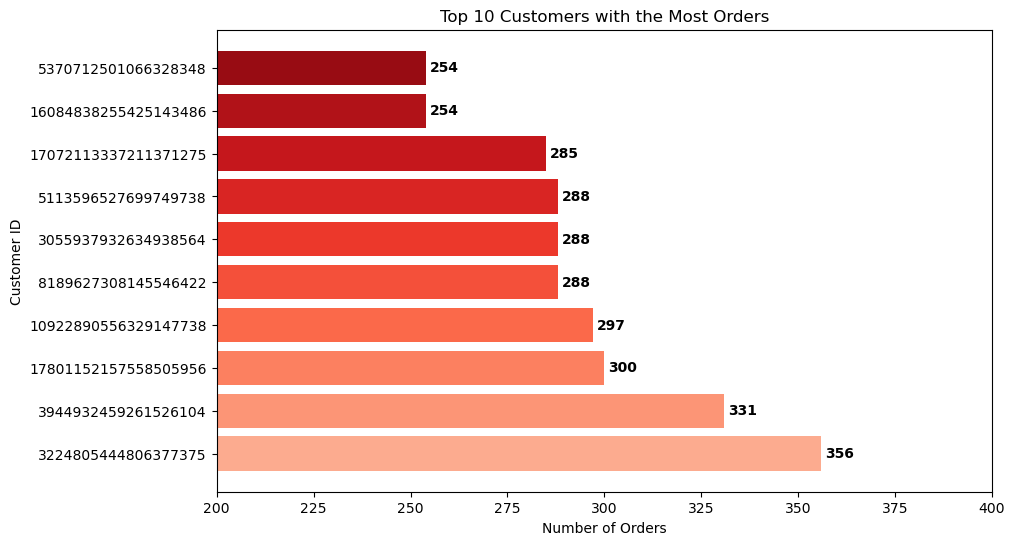

In [108]:
# Get the top 10 customers
top_customers = num_orders.head(10)

# Sort customers in descending order
top_customers = top_customers.sort_values(ascending=False)

# Create a gradient color map
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(top_customers)))

# Create a horizontal bar plot
plt.figure(figsize=(10,6))
plt.barh(top_customers.index.astype(str), top_customers.values, color=colors)
plt.xlim(200, 400)  # Set the x-axis limit to 200-400
plt.xlabel('Number of Orders')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers with the Most Orders')

# Add labels to each bar
for i, v in enumerate(top_customers.values):
    plt.text(v+1, i, str(v), va='center', fontweight='bold')

plt.show()

# The top 10 customers are likely responsible for a significant portion of the business's revenue,
# so it's important to maintain a positive relationship with them. 


# Part 2-2 Pet food preference

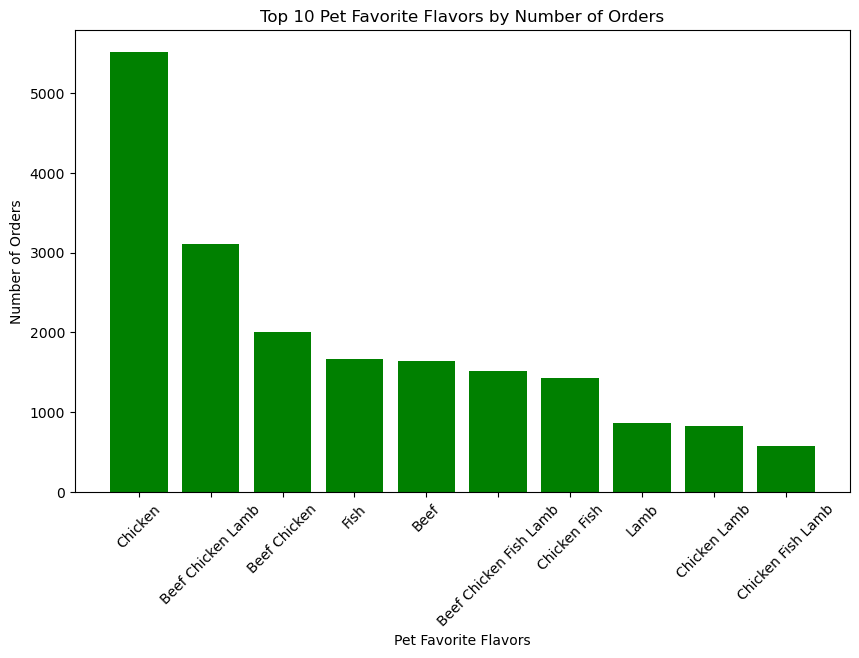

In [109]:
# 1.Calculate the count of orders by pet favorite flavors
fav_flavors = df['pet_fav_flavour_list'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
fav_flavors.name = 'pet_fav_flavour'
orders_by_flavor = df.join(fav_flavors).groupby('pet_fav_flavour').size().sort_values(ascending=False)

# Filter out the 'Unknown' flavor from the orders_by_flavor dataframe
orders_by_flavor = orders_by_flavor[orders_by_flavor.index != 'Unknown']

# Plot the top 10 flavors
top_10_flavors = orders_by_flavor[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_10_flavors.index, top_10_flavors.values, color='green')
plt.xlabel('Pet Favorite Flavors')
plt.ylabel('Number of Orders')
plt.title('Top 10 Pet Favorite Flavors by Number of Orders')
plt.xticks(rotation=45)
plt.show()

# We can see that Chicken, Beef Chicken Lamp, Fish, Beef are popular.


/var/folders/26/c1bkb3tn2xb6kwq543smyqcm0000gn/T/ipykernel_44414/1967152751.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  counts = counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


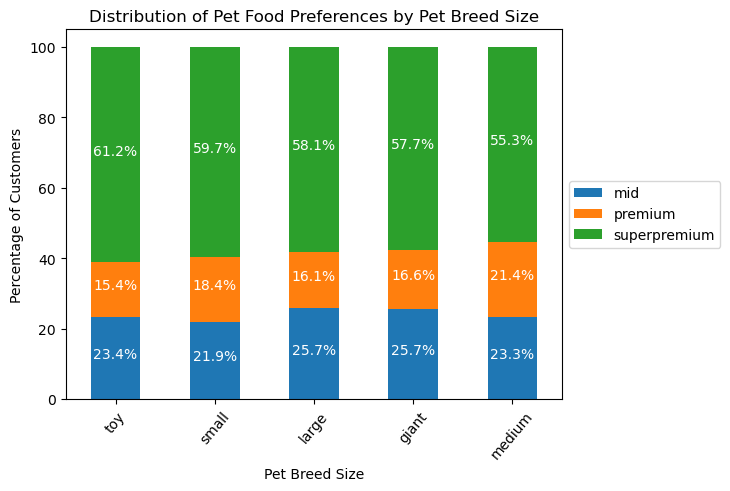

In [110]:
## 2. I want to create a stacked bar chart to show the number or percentage of customers who prefer superpremium, mid, or premium food type. 
# I broke down the preferences by pet breed size (small, medium, large, etc) and 'neutered' status. 
# This visualization can help the business understand the popularity of each type of food 
# and how it varies by breed size and neuter status. 
# The business can use this information to optimize its product offerings and marketing strategies.

# Group the data by pet breed size and count the number of customers who prefer each type of food
counts = df.groupby(['pet_breed_size', 'pet_food_tier'])['customer_id'].count()

# Calculate the percentage of customers in each group per variable
counts = counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Unstack the pet_food_tier level to create a separate column for each food type
counts = counts.unstack('pet_food_tier')

# Sort the counts in descending order
counts = counts.sort_values(by='superpremium', ascending=False)

# Plot a stacked bar chart
ax = counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Pet Breed Size')
plt.ylabel('Percentage of Customers')
plt.title('Distribution of Pet Food Preferences by Pet Breed Size')

# Add percentage labels for each food type within each pet breed size
for i in range(len(counts)):
    for j in range(len(counts.columns)):
        ax.text(i, counts.iloc[i, :j+1].sum() - 0.5 * counts.iloc[i, j], 
                f"{counts.iloc[i, j]:.1f}%", color='white', fontsize=10, ha='center')

# Move the legend to the right side of the chart
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Rotate the xticks by 50 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

# Show the plot
plt.show()



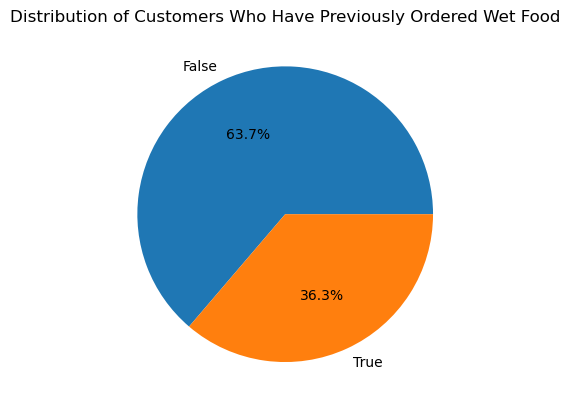

In [111]:
# 3.Count the number of customers who have previously ordered wet food and those who have not
counts = df['ate_wet_food_pre_tails'].value_counts()

# Create a pie chart
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Customers Who Have Previously Ordered Wet Food')

# Show the plot
plt.show()

# 36.3%  of customers ordered have previously ordered wet food.

# Part2-3 Distribution of health issues

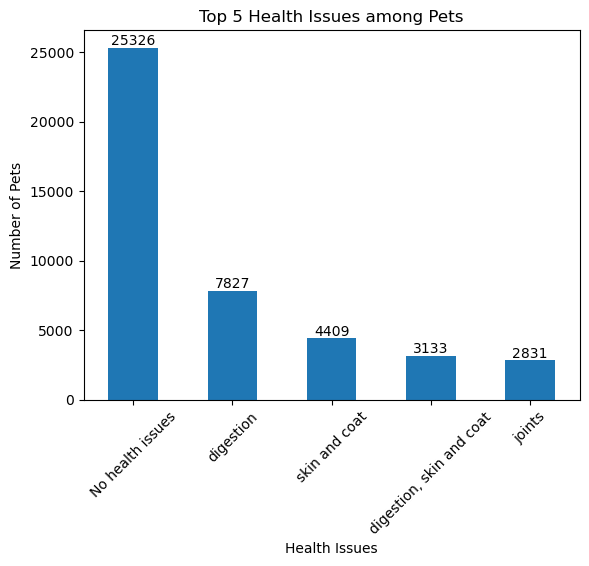

In [112]:
# Group the data by health issue and count the number of pets with each issue
counts = df.groupby(['pet_health_issue_list'])['pet_id'].count()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)

# Select the top 5 health issues
top_5_health_issues = counts.head(5)

# Create a bar chart to show the number of pets with each health issue
ax = top_5_health_issues.plot(kind='bar', rot=0)

# Add number labels above each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

# Set axis labels and title
plt.xlabel('Health Issues')
plt.ylabel('Number of Pets')
plt.title('Top 5 Health Issues among Pets')
plt.xticks(rotation=45) # Rotate the x-axis tick labels by 45 degrees
# Show the plot
plt.show()

# We can see that the majority of these pets don't have health issues, followed by digestion, skin and coat issues.


# Part 2-4. Order history analysis

In [113]:
# Calculate retention rate/orders by different factors
# This visualization can help the business understand how loyal its customers are 
# and how customer loyalty varies by different factors.

# I might be interested in time, pet_health_issue_list,
# view column names
print(df.columns)

Index(['customer_id', 'pet_id', 'pet_order_number', 'wet_food_order_number',
       'orders_since_first_wet_trays_order', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'order_payment_date', 'kibble_kcal',
       'wet_kcal', 'total_order_kcal', 'wet_trays',
       'wet_food_discount_percent', 'wet_tray_size', 'premium_treat_packs',
       'dental_treat_packs', 'wet_food_textures_in_order',
       'total_web_sessions', 'total_web_sessions_since_last_order',
       'total_minutes_on_website', 'total_minutes_on_website_since_last_order',
       'total_wet_food_updates', 'total_wet_food_updates_since_last_order',
       'last_customer_support_ticket_date', 'customer_support_ticket_category',
       'Order_year_month', 'Order_year', 'Order_month',
       'las

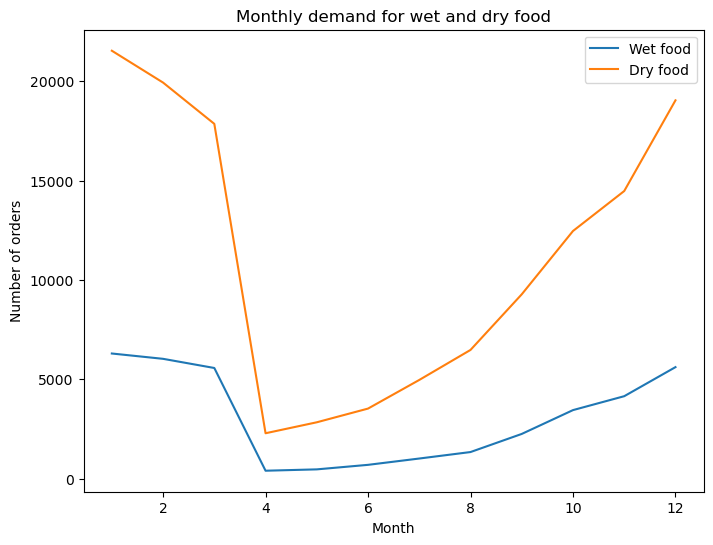

In [114]:
#  Montly demand for wet food and dry food

# Calculate sum of monthly wet food orders
wet_food_orders = df.groupby('Order_month')['wet_food_order_number'].sum()

# Calculate sum of monthly dry food orders
dry_food_orders = df.groupby('Order_month')['pet_order_number'].sum() - wet_food_orders
# Create line chart
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(wet_food_orders.index, wet_food_orders, label='Wet food')
ax.plot(dry_food_orders.index, dry_food_orders, label='Dry food')
df.groupby('Order_month')['pet_order_number'].sum()
# Set x-axis label and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of orders')
ax.set_title('Monthly demand for wet and dry food')

# Add legend
ax.legend()

plt.show()

# Jan has the most orders among a year, then followed by Feb, Dec and Mar.
# it's possible that there are certain holidays or events that occur during certain months 
# that could be influencing customer behavior. 

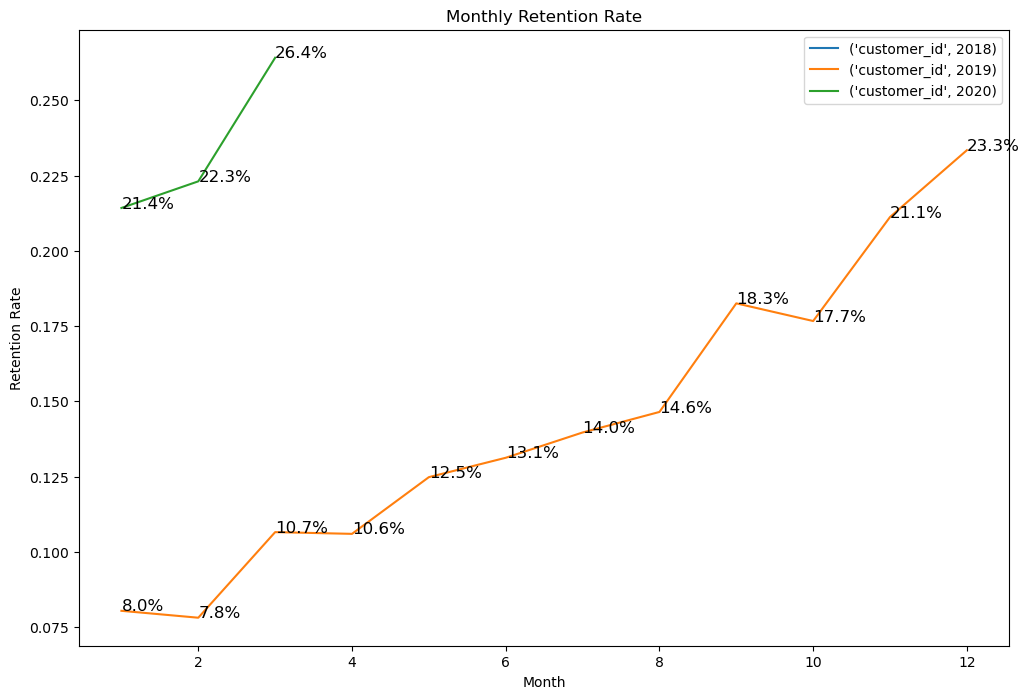

In [115]:
#Calculate the retention rate for each time period. 

#Grouping the data by the Order_year and Order_month column and counting the number of customers 
# who made repeat purchases in each month.

# Calculate the retention rate
repeat_customers = df[df.wet_food_order_number > 1]
cohort_counts = repeat_customers.groupby(['Order_year', 'Order_month']).agg({'customer_id': pd.Series.nunique})
cohort_sizes = df.groupby(['Order_year', 'Order_month']).agg({'customer_id': pd.Series.nunique})
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention_rate = retention.unstack(0)

# Create the line chart
fig, ax = plt.subplots(figsize=(12,8))
for col in retention_rate.columns:
    ax.plot(retention_rate.index.values, retention_rate[col].values, label=str(col))
    for i, txt in enumerate(retention_rate[col].values):
        ax.annotate("{:.1%}".format(txt), (retention_rate.index.values[i], txt), fontsize=12)
ax.set_xlabel('Month')
ax.set_ylabel('Retention Rate')
ax.set_title('Monthly Retention Rate')
ax.legend()
plt.show()

# The increase in retention rate during the winter months could be due to customers' increased loyalty during the holiday season, 


# Part 3: Clustering

In [116]:
# To find pet groups based on  wet food orders, and treat packs (premium + dental) purchased by pet_id
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt



In [117]:
# Created a subset
subset_df = df[['pet_id', 'wet_food_order_number', 'pet_order_number']]
subset_df['total_treat_packs'] = df['premium_treat_packs'] + df['dental_treat_packs']
subset_df

/var/folders/26/c1bkb3tn2xb6kwq543smyqcm0000gn/T/ipykernel_44414/1837460503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['total_treat_packs'] = df['premium_treat_packs'] + df['dental_treat_packs']


,pet_id,wet_food_order_number,pet_order_number,total_treat_packs
0,4466839344031767293,1,2,0
1,4466839344031767293,0,1,0
2,4466839344031767293,7,8,0
3,4466839344031767293,3,4,0
4,4466839344031767293,8,9,0
...,...,...,...,...
49037,2984998389777880417,0,1,0
49038,7874266462031746824,0,1,0
49039,8164901917956451162,0,1,0
49040,17212948402249140630,1,1,0


# K-means

In [118]:
# Because this dataset has 49000+ rows.The dendrogram operation can be memory-intensive,
# especially for large datasets. So I choose K-Means to do clustering.
#data scaling
scaler=MinMaxScaler() #initialize
scaler.fit(subset_df)
scaled_subset_df=scaler.transform(subset_df)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

Text(0, 0.5, 'Within cluster variation')

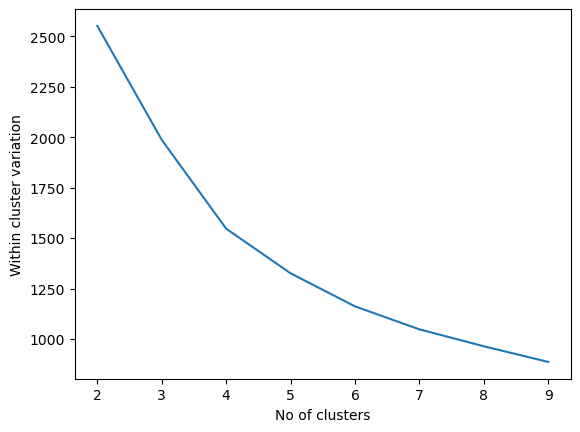

In [119]:
wcv = []
silk_score = []

for i in range(2,10):
    km = KMeans(n_clusters= i,random_state = 0)
    km.fit(scaled_subset_df)
    
    wcv.append(km.inertia_)# within cluster variation
    silk_score.append(silhouette_score(scaled_subset_df, km.labels_))

# plotting the wcv
plt.plot(range(2,10),wcv)
plt.xlabel('No of clusters')
plt.ylabel('Within cluster variation')

# There is an elbow at 4.


Text(0, 0.5, 'Silhoutte score')

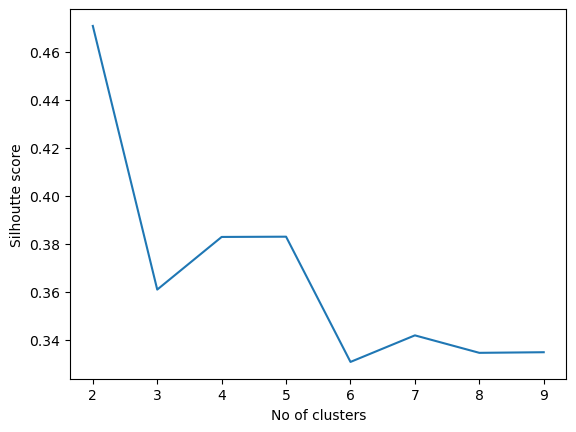

In [120]:
# plotting silk score
plt.plot(range(2,10),silk_score)
plt.xlabel('No of clusters')
plt.ylabel('Silhoutte score')
# I would like to pick 4 

In [121]:
# lets go with 4 clusters
km4 = KMeans(n_clusters= 4,random_state = 0)# initialize
km4.fit(scaled_subset_df)# train: fining clusters
    
km4.labels_

subset_df['labels']=km4.labels_
subset_df

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/26/c1bkb3tn2xb6kwq543smyqcm0000gn/T/ipykernel_44414/140250662.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['labels']=km4.labels_


,pet_id,wet_food_order_number,pet_order_number,total_treat_packs,labels
0,4466839344031767293,1,2,0,2
1,4466839344031767293,0,1,0,2
2,4466839344031767293,7,8,0,1
3,4466839344031767293,3,4,0,2
4,4466839344031767293,8,9,0,1
...,...,...,...,...,...
49037,2984998389777880417,0,1,0,2
49038,7874266462031746824,0,1,0,3
49039,8164901917956451162,0,1,0,3
49040,17212948402249140630,1,1,0,0


In [122]:
subset_df['pet_has_active_subscription'] = df['pet_has_active_subscription']  # Add 'pet_has_active_subscription' column
subset_df

/var/folders/26/c1bkb3tn2xb6kwq543smyqcm0000gn/T/ipykernel_44414/3548511009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['pet_has_active_subscription'] = df['pet_has_active_subscription']  # Add 'pet_has_active_subscription' column


,pet_id,wet_food_order_number,pet_order_number,total_treat_packs,labels,pet_has_active_subscription
0,4466839344031767293,1,2,0,2,True
1,4466839344031767293,0,1,0,2,True
2,4466839344031767293,7,8,0,1,True
3,4466839344031767293,3,4,0,2,True
4,4466839344031767293,8,9,0,1,True
...,...,...,...,...,...,...
49037,2984998389777880417,0,1,0,2,True
49038,7874266462031746824,0,1,0,3,False
49039,8164901917956451162,0,1,0,3,False
49040,17212948402249140630,1,1,0,0,False


In [123]:
# interpreting cluster 1
subset_df.groupby('labels').mean()
subset_df.loc[subset_df['labels']==0].describe()


,pet_id,wet_food_order_number,pet_order_number,total_treat_packs,labels
count,1.563600e+04,15636.000000,15636.000000,15636.000000,15636.0
mean,1.534277e+19,0.635776,3.044065,0.344909,0.0
std,1.789230e+18,1.355059,2.031329,1.066839,0.0
min,1.201869e+19,0.000000,1.000000,0.000000,0.0
25%,1.378122e+19,0.000000,1.000000,0.000000,0.0
50%,1.528098e+19,0.000000,2.000000,0.000000,0.0
75%,1.691558e+19,1.000000,4.000000,0.000000,0.0
max,1.844234e+19,10.000000,12.000000,16.000000,0.0


In [124]:
subset_df.loc[subset_df['labels'] == 0, 'pet_has_active_subscription'].value_counts()


True     10417
False     5219
Name: pet_has_active_subscription, dtype: int64

In [125]:
# interpreting cluster 2
subset_df.groupby('labels').mean()
subset_df.loc[subset_df['labels']==1].describe()

,pet_id,wet_food_order_number,pet_order_number,total_treat_packs,labels
count,4.169000e+03,4169.000000,4169.000000,4169.000000,4169.0
mean,9.306662e+18,2.309667,10.090189,0.636364,1.0
std,3.828339e+18,3.849908,3.184207,1.594190,0.0
min,3.579208e+16,0.000000,6.000000,0.000000,1.0
25%,6.686809e+18,0.000000,8.000000,0.000000,1.0
50%,9.318042e+18,0.000000,9.000000,0.000000,1.0
75%,1.196333e+19,5.000000,12.000000,0.000000,1.0
max,1.840930e+19,20.000000,20.000000,16.000000,1.0


In [126]:
subset_df.loc[subset_df['labels'] == 1, 'pet_has_active_subscription'].value_counts()

True     3196
False     973
Name: pet_has_active_subscription, dtype: int64

In [127]:
# interpreting cluster 3
subset_df.groupby('labels').mean()
subset_df.loc[subset_df['labels']==2].describe()

,pet_id,wet_food_order_number,pet_order_number,total_treat_packs,labels
count,1.492700e+04,14927.000000,14927.000000,14927.000000,14927.0
mean,2.945731e+18,0.667783,3.072821,0.354592,2.0
std,1.720848e+18,1.403837,2.073160,1.138833,0.0
min,3.629657e+14,0.000000,1.000000,0.000000,2.0
25%,1.479239e+18,0.000000,1.000000,0.000000,2.0
50%,2.878380e+18,0.000000,2.000000,0.000000,2.0
75%,4.441523e+18,1.000000,4.000000,0.000000,2.0
max,6.275782e+18,9.000000,12.000000,36.000000,2.0


In [128]:
subset_df.loc[subset_df['labels'] == 2, 'pet_has_active_subscription'].value_counts()


True     9884
False    5043
Name: pet_has_active_subscription, dtype: int64

In [129]:
# interpreting cluster 4
subset_df.groupby('labels').mean()
subset_df.loc[subset_df['labels']==3].describe()

,pet_id,wet_food_order_number,pet_order_number,total_treat_packs,labels
count,1.431000e+04,14310.000000,14310.000000,14310.000000,14310.0
mean,9.160671e+18,0.540811,2.546261,0.311880,3.0
std,1.807351e+18,1.113820,1.483548,0.993482,0.0
min,5.897352e+18,0.000000,1.000000,0.000000,3.0
25%,7.621903e+18,0.000000,1.000000,0.000000,3.0
50%,9.158815e+18,0.000000,2.000000,0.000000,3.0
75%,1.070896e+19,1.000000,4.000000,0.000000,3.0
max,1.239180e+19,5.000000,6.000000,15.000000,3.0


In [130]:
subset_df.loc[subset_df['labels'] == 3, 'pet_has_active_subscription'].value_counts()


True     9398
False    4912
Name: pet_has_active_subscription, dtype: int64

In [131]:
##Summary of clustering
# Optimal k is 4
# Cluster size: 
# c1(15636) > c3 (14927) > c4 (14310) > c2 (4169)

# Comparing the means of 4 clusters:
# c1: Biggest size of group , lowest wet food orders, 66% of this group has active subscription.
# c2: Smallest size of cluster, highest wet food order numbers, highest pet food order count, highest treat packs, 77% of this group has active subscription.
# c3: Relative big size of cluster, moderately low wet food order,  second highest treat packs, 66% of this group has cctive subscription.
# c4: Lowest wet food order count and lowest pet order number, lowest total treat packs, 65.7% of this group has active subscription.

# Key takeaway
# c2 for high wet food orders,  pet food orders, and treat packs
# c2 also has highest number of active subscription
# Cluster 4 has lowest wet food orders, lowest total food orders, and lowest treat packs.
# C4 also has a lowest  proportion of active subscription.


In [132]:
# Recommendations: 
# Target Cluster 2 (c2) customers who have high wet food orders, pet food orders, and treat packs. 
# Develop marketing campaigns to promote wet food products and emphasize the benefits of subscription plans.

#Focus on upselling wet food products to customers in Cluster 1 (c1) by highlighting the benefits,
# offering incentives, and cross-selling wet food items.

# Increase engagement of customers in Cluster 3 (c3) by showcasing the benefits of wet food, 
# offering promotions, and emphasizing its convenience and value.

#Develop targeted strategies for customers in Cluster 4 (c4) with low wet food orders. 
# Highlight the benefits, offer incentives to try wet food, and provide personalized recommendations.

# Part 4: Predictive Model

In [133]:
import pandas as pd
import numpy as np

In [134]:
# read the data into a dataframe
df = pd.read_csv('Cleaned_data.csv')
df.head()

,customer_id,pet_id,pet_order_number,wet_food_order_number,orders_since_first_wet_trays_order,pet_has_active_subscription,pet_food_tier,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,...,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order,last_customer_support_ticket_date,customer_support_ticket_category,Order_year_month,Order_year,Order_month,last_customer_support_ticket_year,last_customer_support_ticket_month
0,10574848487411271014,4466839344031767293,2,1,1,True,superpremium,No known allergies,Chicken,"digestion, joints",...,32,0,0,2019-03,proactive,2019-04,2019,4,2019,3
1,10574848487411271014,4466839344031767293,1,0,0,True,superpremium,No known allergies,Chicken,"digestion, joints",...,3,0,0,2019-03,proactive,2019-03,2019,3,2019,3
2,10574848487411271014,4466839344031767293,8,7,7,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,0,2019-10,account,2019-10,2019,10,2019,10
3,10574848487411271014,4466839344031767293,4,3,3,True,superpremium,No known allergies,Chicken,"digestion, joints",...,15,0,0,2019-04,account,2019-05,2019,5,2019,4
4,10574848487411271014,4466839344031767293,9,8,8,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,0,2019-10,account,2019-11,2019,11,2019,10


In [135]:
# Number of pets in a household
pet_population = df.groupby('customer_id')['pet_id'].nunique().reset_index()
pet_population.columns = ['customer_id', 'number_of_pets_in_house']
df = pd.merge(df, pet_population, on='customer_id')
df

,customer_id,pet_id,pet_order_number,wet_food_order_number,orders_since_first_wet_trays_order,pet_has_active_subscription,pet_food_tier,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,...,total_wet_food_updates,total_wet_food_updates_since_last_order,last_customer_support_ticket_date,customer_support_ticket_category,Order_year_month,Order_year,Order_month,last_customer_support_ticket_year,last_customer_support_ticket_month,number_of_pets_in_house
0,10574848487411271014,4466839344031767293,2,1,1,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,2019-03,proactive,2019-04,2019,4,2019,3,1
1,10574848487411271014,4466839344031767293,1,0,0,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,2019-03,proactive,2019-03,2019,3,2019,3,1
2,10574848487411271014,4466839344031767293,8,7,7,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,2019-10,account,2019-10,2019,10,2019,10,1
3,10574848487411271014,4466839344031767293,4,3,3,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,2019-04,account,2019-05,2019,5,2019,4,1
4,10574848487411271014,4466839344031767293,9,8,8,True,superpremium,No known allergies,Chicken,"digestion, joints",...,0,0,2019-10,account,2019-11,2019,11,2019,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49037,14376510399648056534,437307738254549355,1,1,1,False,superpremium,No known allergies,Unknown,joints,...,0,0,2015-03,account,2020-01,2020,1,2015,3,1
49038,14376510399648056534,437307738254549355,2,2,2,False,superpremium,No known allergies,Unknown,joints,...,0,0,2015-03,account,2020-02,2020,2,2015,3,1
49039,7645599807496891448,14602868209783289668,1,0,0,True,superpremium,No known allergies,Unknown,No health issues,...,0,0,2015-03,account,2020-03,2020,3,2015,3,1
49040,1602644382369102712,2984998389777880417,1,0,0,True,superpremium,beef dairy egg soya wheat,Unknown,skin and coat,...,0,0,2019-08,account,2020-03,2020,3,2019,8,1


In [136]:
df.columns


Index(['customer_id', 'pet_id', 'pet_order_number', 'wet_food_order_number',
       'orders_since_first_wet_trays_order', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'dry_food_brand_pre_tails',
       'pet_life_stage_at_order', 'order_payment_date', 'kibble_kcal',
       'wet_kcal', 'total_order_kcal', 'wet_trays',
       'wet_food_discount_percent', 'wet_tray_size', 'premium_treat_packs',
       'dental_treat_packs', 'wet_food_textures_in_order',
       'total_web_sessions', 'total_web_sessions_since_last_order',
       'total_minutes_on_website', 'total_minutes_on_website_since_last_order',
       'total_wet_food_updates', 'total_wet_food_updates_since_last_order',
       'last_customer_support_ticket_date', 'customer_support_ticket_category',
       'Order_year_month', 'Order_year', 'Order_month',
       'las

In [137]:
# Linear regression model

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse

In [139]:
# Exclude 'pet_id' and 'customer_id' columns
selected_columns = [col for col in df.columns if col not in ['pet_id', 'customer_id']]

# Create a new DataFrame with the selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = selected_df.corr()


print(corr_matrix)


                                           pet_order_number  \
pet_order_number                                   1.000000   
wet_food_order_number                              0.286762   
orders_since_first_wet_trays_order                 0.364064   
pet_has_active_subscription                        0.102361   
neutered                                           0.077099   
ate_wet_food_pre_tails                            -0.070065   
kibble_kcal                                        0.181236   
wet_kcal                                           0.044279   
total_order_kcal                                   0.189610   
wet_trays                                          0.036206   
wet_food_discount_percent                         -0.209743   
premium_treat_packs                                0.079354   
dental_treat_packs                                 0.076749   
total_web_sessions                                 0.697643   
total_web_sessions_since_last_order                0.14

/var/folders/26/c1bkb3tn2xb6kwq543smyqcm0000gn/T/ipykernel_44414/4279630932.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selected_df.corr()


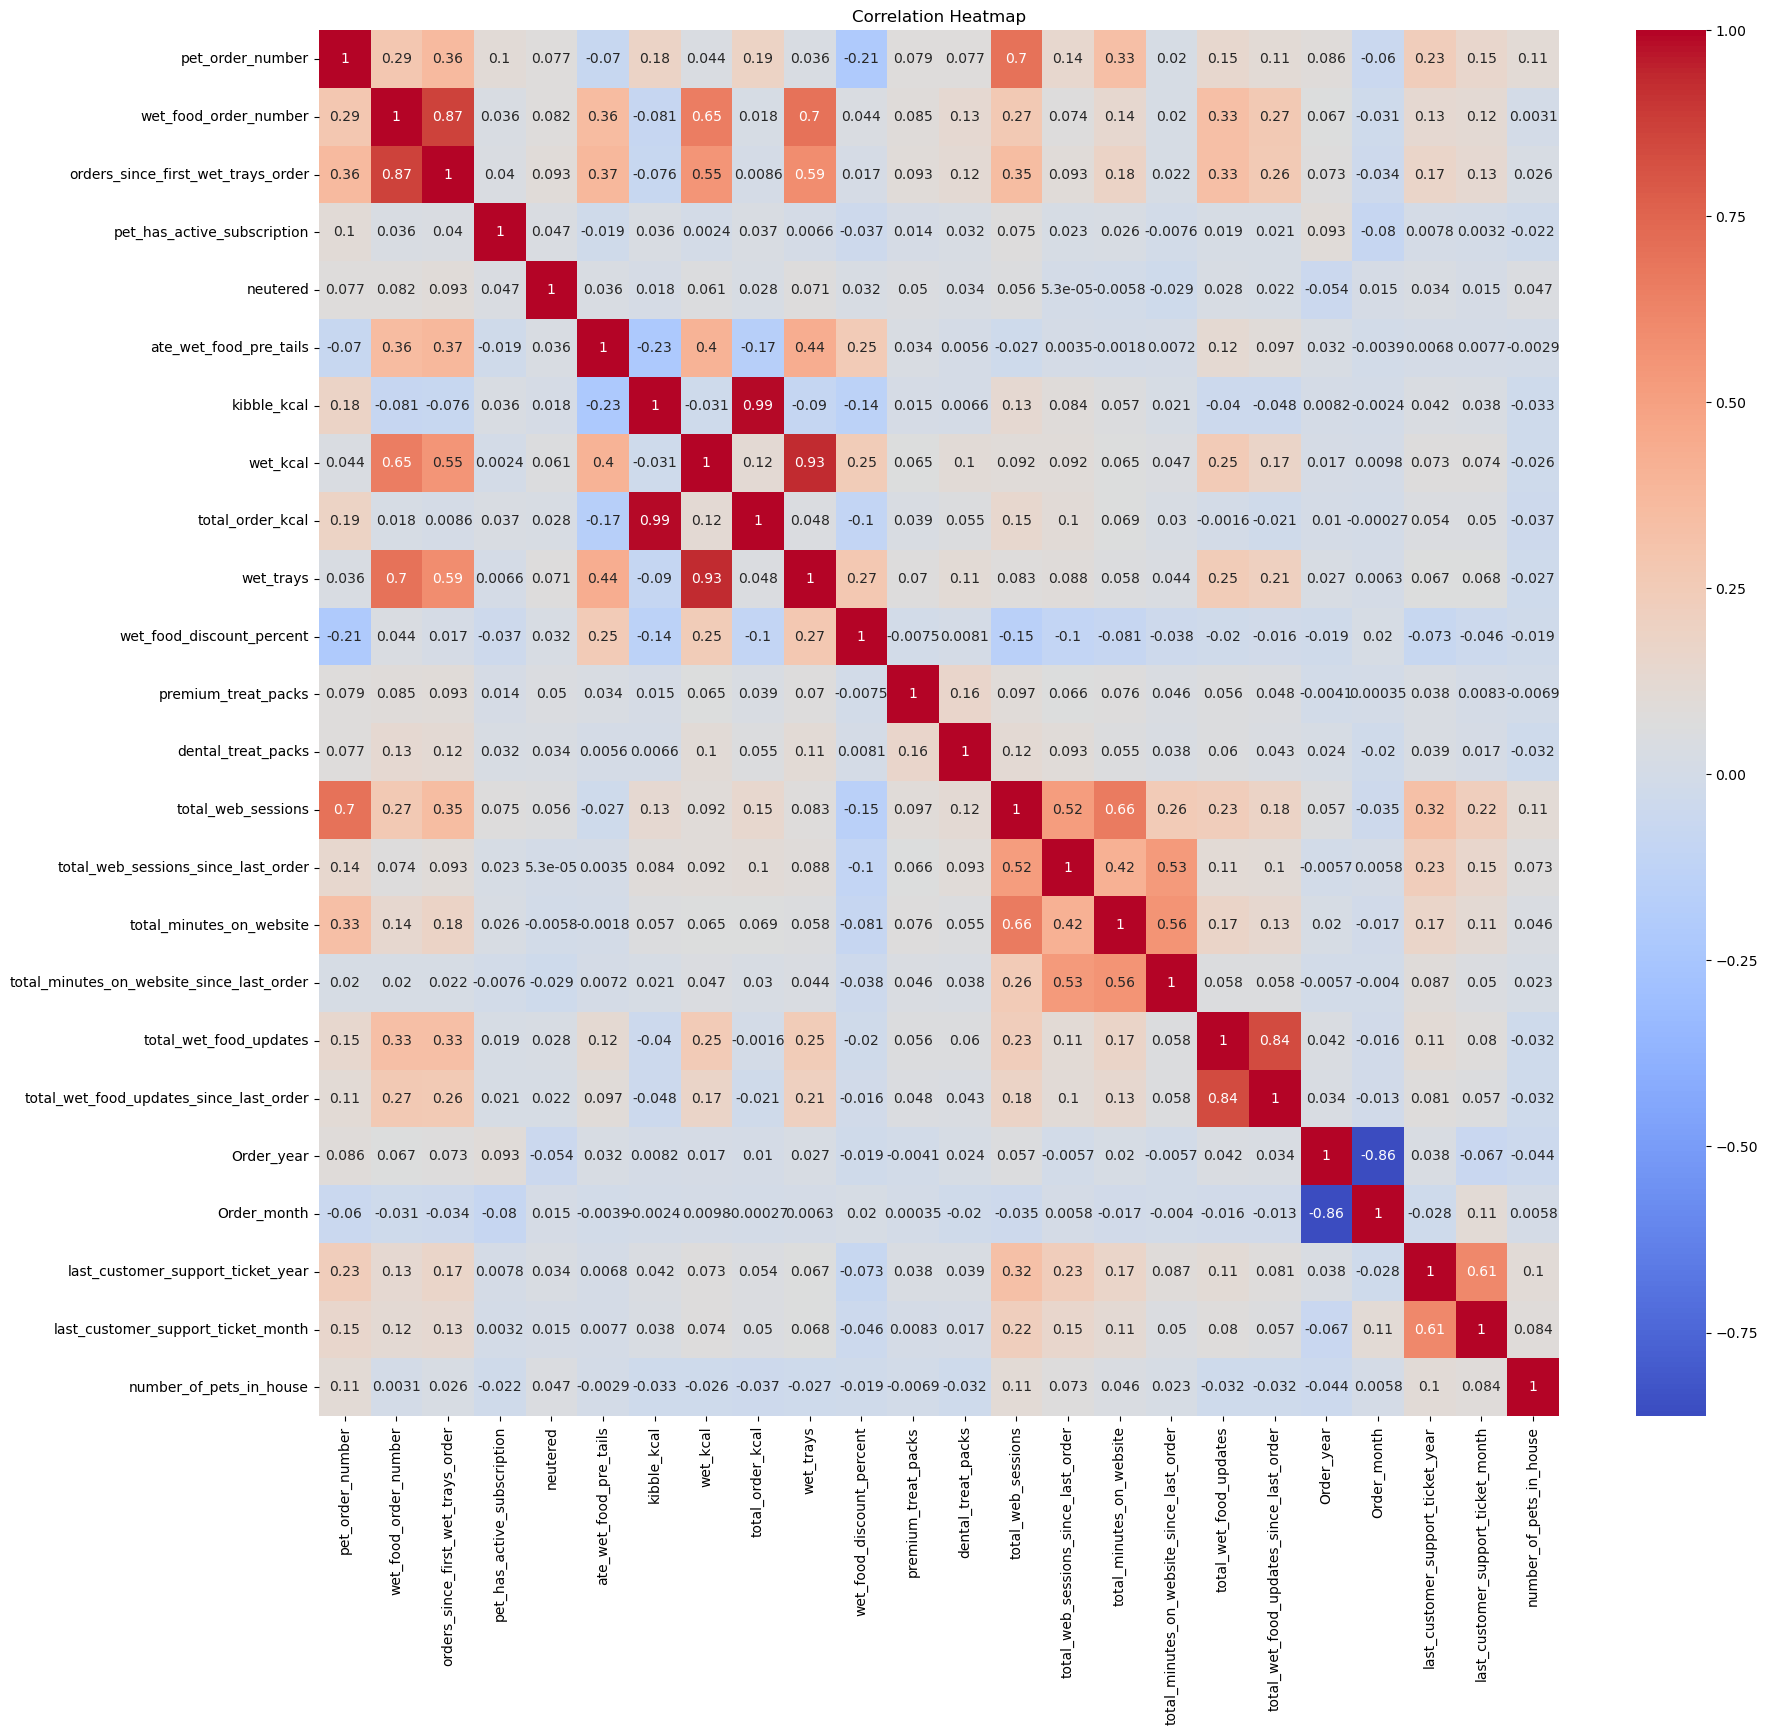

In [140]:
# Plot the correlation heatmap
plt.figure(figsize=(20, 18))  # Increase the figsize to make the heatmap bigger
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# The correlation between 'wet_food_order_number' and 'orders_since_first_wet_trays_order' is 0.87.
# The correlation between 'total_web_sessions' and 'pet_order_number' is 0.70.
# The correlation between 'total_minutes_on_website' and 'total_web_session' is 0.66.
# The correlation between 'total_wet_food_updates' and 'total_wet_food_updates_since_last_order' is 0.84.
# wet_kcal and wet_food_order_number: 0.65.
# wet_trays  and wet_kca: 0.93
#total_order_kcal  and kibble_kcal: 0.99


In [172]:
#Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

In [173]:
# Create a subset of the dataframe with the selected columns
subset_df = df[['wet_food_order_number', 'pet_order_number','orders_since_first_wet_trays_order', 'total_web_sessions', 'ate_wet_food_pre_tails','wet_kcal','wet_trays','total_minutes_on_website','total_wet_food_updates','total_wet_food_updates_since_last_order']]

x = subset_df.drop('wet_food_order_number', axis=1)
y = subset_df['wet_food_order_number']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [174]:
# Initialize the linear regression model
model = LinearRegression()


In [175]:
# Initialize RFE with the model and desired number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE on the scaled training data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

In [176]:
from sklearn.linear_model import Lasso

# Create a Lasso model
model = Lasso(alpha=0.1)

# Fit Lasso on the scaled training data
model.fit(x_train, y_train)

# Get the coefficients and corresponding features
coefficients = model.coef_
selected_features = x_train.columns[coefficients != 0]

In [177]:
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]


In [178]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_selected, y_train)

LinearRegression()

In [179]:
y_pred = model.predict(x_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2_score = model.score(x_test_selected, y_test)
# Additional evaluation metrics as needed
print("Mean Squared Error:", mse)
print("R-squared Score:", r2_score)

Mean Squared Error: 0.6239937010574546
R-squared Score: 0.8062419565075802


In [180]:
#The R-squared score of 0.80 suggests that approximately 80% of the variance in the target variable 
# can be explained by the linear regression model.

# Decision Trees 

In [181]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# Create a decision tree regressor model
tree = DecisionTreeRegressor()

In [183]:
# Fit the model to the training data
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [184]:
# Make predictions on the training data
y_train_pred = tree.predict(x_train)


In [185]:
# Calculate mean squared error and R-squared score for training set predictions
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

In [186]:
# Make predictions on the test set
y_test_pred = tree.predict(x_test)

# Calculate mean squared error and R-squared score for test set predictions
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


In [187]:
# Print the performance metrics
print("Training Set:")
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)
print()
print("Test Set:")
print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)

# R square score is 0.98 which means about 98% of the variance in the target variable 
# can be explained by the decision tree model.

Training Set:
Mean Squared Error: 6.372186679580964e-05
R-squared Score: 0.99997865583488

Test Set:
Mean Squared Error: 0.059052910592313185
R-squared Score: 0.9816633142297604


# Random Forest

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [189]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initialize a random forest regressor model
rf_model = RandomForestRegressor()

In [190]:
# Fit the model to the training data
rf_model.fit(x_train, y_train)


RandomForestRegressor()

In [191]:
# Make predictions on the training data
y_pred_train = rf_model.predict(x_train)


In [192]:
# Make predictions on the testing data
y_pred = rf_model.predict(x_test)

In [193]:
# Calculate mean squared error for the training set
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared score for the training set
r2_train = r2_score(y_train, y_pred_train)

# Print the performance metrics for the training set
print("Training Set:")
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)
print()


Training Set:
Mean Squared Error: 0.004930458142285736
R-squared Score: 0.9983485023587945



In [194]:
# Calculate mean squared error for the test set
mse_test = mean_squared_error(y_test, y_pred)

# Calculate R-squared score for the test set
r2_test = r2_score(y_test, y_pred)

# Print the performance metrics for the test set
print("Test Set:")
print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)

Test Set:
Mean Squared Error: 0.025497583115594268
R-squared Score: 0.9920826735752449


In [195]:
# low mean squared error (MSE) of 0.03
# R-squared score is improved to 0.99. 